Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

#### <font color='orange'>Полезные ссылки:</font>
* Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k .

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Отлично, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в дальнейшем обучении и следующих работах!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Полезные-ссылки:" data-toc-modified-id="Полезные-ссылки:-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span><font color="orange">Полезные ссылки:</font></a></span></li></ul></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import os
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor
import time
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
pth1_train = '/datasets/taxi.csv'
pth2_train = 'taxi.csv'

if os.path.exists(pth1_train):
    data = pd.read_csv(pth1_train, index_col=[0], parse_dates=[0])
elif os.path.exists(pth2_train):
    data = pd.read_csv(pth2_train, index_col=[0], parse_dates=[0])
else:
    print('Something is wrong')

In [3]:
data.sort_index(inplace=True)
data = data.resample('1H').sum()

- Оькрыл файл
- заисал данные а переменную `data`
- Рассемплировал данные по 1 часу

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно. Ресемплинг был сделан верно.
</div>

## Анализ

In [4]:
decomposed = seasonal_decompose(data) 

Text(0.5, 1.0, 'Trend')

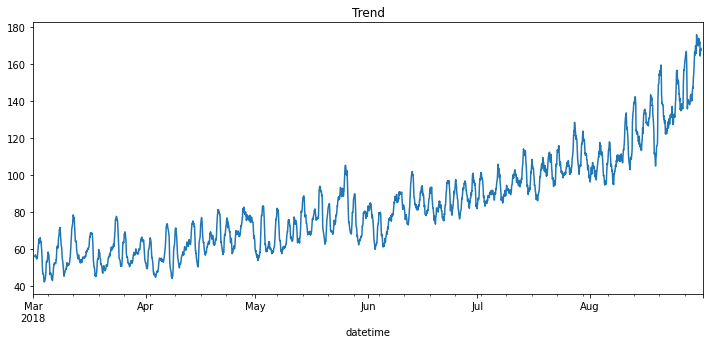

In [5]:
plt.figure(figsize=(12, 5))
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

Text(0.5, 1.0, 'Seasonal')

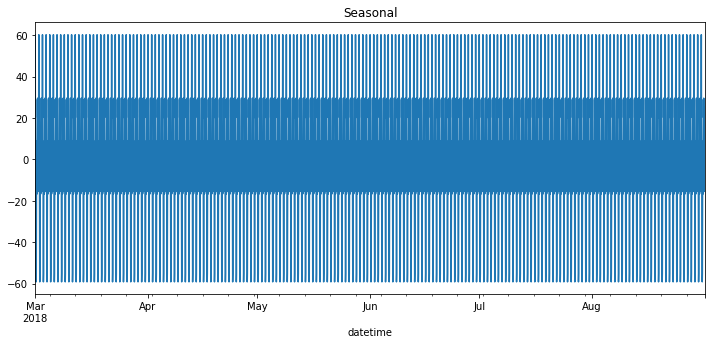

In [6]:
plt.figure(figsize=(12, 5))
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonal')

Text(0.5, 1.0, 'Resid')

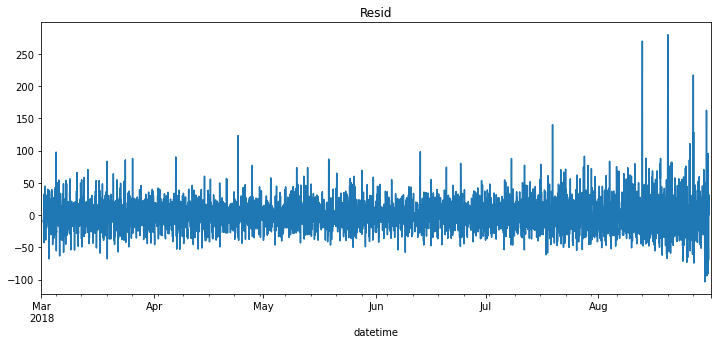

In [7]:
plt.figure(figsize=(12, 5))
decomposed.resid.plot(ax=plt.gca())
plt.title('Resid')

Text(0.5, 1.0, 'Seasonality')

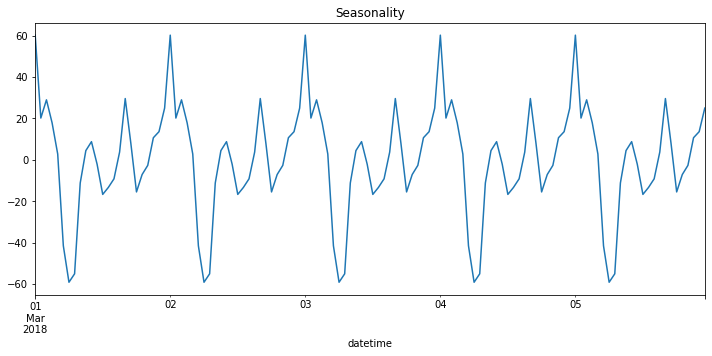

In [8]:
plt.figure(figsize=(12, 5))
decomposed.seasonal['2018-03-01':'2018-03-05'].plot(ax=plt.gca())
plt.title('Seasonality')


<div class="alert alert-block alert-success">
<b>Успех:</b> Декомпозиция была сделана верно. Хорошо, что сезонность была визуализирована на более коротком интервале!
</div>

In [9]:
def make_features(data, max_lag, rolling_mean_size):
    data_new = data.copy()
    data_new['month'] = data.index.month
    data_new['day'] = data.index.day
    data_new['dayofweek'] = data.index.dayofweek
    data_new['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data_new['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
        
    data_new['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    data_new['std'] = data['num_orders'].shift().rolling(rolling_mean_size).std()
    return data_new 
data_new = make_features(data, 15, 15)

<div class="alert alert-block alert-info">

<b>Совет: </b> Желательно было написать функцию таким образом, чтобы она возвращала новый датафрейм, а не изменяла глобальную переменную.
1. Это хорошая практика (не изменять глобальные переменные внутри функции), которая улучшает читаемость кода.
2. В какой-то момент может появиться необходимость подбирать некоторые параметры используемый внутри функции. В этот момент копирование датасета станет обязательным.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> <br>
так?

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Да.
</div>

In [10]:
train, test = train_test_split(data_new, shuffle=False, test_size=0.1)

In [11]:
train = train.dropna()

In [12]:
target_train = train['num_orders']
target_test = test['num_orders']
features_train = train.drop('num_orders', axis = 1)
features_test = test.drop('num_orders', axis = 1)

In [13]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4416 non-null   int64  
 1   month         4416 non-null   int64  
 2   day           4416 non-null   int64  
 3   dayofweek     4416 non-null   int64  
 4   hour          4416 non-null   int64  
 5   lag_1         4415 non-null   float64
 6   lag_2         4414 non-null   float64
 7   lag_3         4413 non-null   float64
 8   lag_4         4412 non-null   float64
 9   lag_5         4411 non-null   float64
 10  lag_6         4410 non-null   float64
 11  lag_7         4409 non-null   float64
 12  lag_8         4408 non-null   float64
 13  lag_9         4407 non-null   float64
 14  lag_10        4406 non-null   float64
 15  lag_11        4405 non-null   float64
 16  lag_12        4404 non-null   float64
 17  lag_13        4403 non-null

In [14]:
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-01 15:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


- Посмотрел тренд,сезонность и остаток 
- Написал функцию для создания параметров
- Разделил выборку на тренировочную и тестовую 90%/10%
- Выделил целевые признаки

<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение было сделано корректно.
</div>

## Обучение

In [15]:
from sklearn.model_selection import TimeSeriesSplit

In [16]:
ts = TimeSeriesSplit()

In [17]:
lr_model = LinearRegression()

start = time.time() 
lr_model.fit(features_train, target_train)
end = time.time()
fit_lr_time = end - start

start = time.time() 
predict_train = lr_model.predict(features_train)
end = time.time()
pred_lr_time = end-start
lr_model_score = (mse(target_train, predict_train))**0.5

print(lr_model_score)
print(fit_lr_time)
print(pred_lr_time)

29.824457666929337
0.0060577392578125
0.04189157485961914


In [18]:
parametrs = {'max_depth': np.arange(2, 20)}

grid_dtr = GridSearchCV(DecisionTreeRegressor(),
                       parametrs,
                       cv=ts,
                       scoring='neg_root_mean_squared_error',
                       n_jobs=-1,
                       verbose=10
                       )
grid_dtr.fit(features_train, target_train)
best_score_dtr = -1*grid_dtr.best_score_
best_params_dtr = grid_dtr.best_params_
best_score_dtr = -1*grid_dtr.best_score_
best_model_dtr = grid_dtr.best_estimator_
best_time_dtr = grid_dtr.refit_time_
print(best_params_dtr)
print(best_score_dtr)
print(best_time_dtr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START max_depth=2................................................
[CV 1/5; 1/18] END ..............................max_depth=2; total time=   0.0s
[CV 2/5; 1/18] START max_depth=2................................................
[CV 2/5; 1/18] END ..............................max_depth=2; total time=   0.1s
[CV 3/5; 1/18] START max_depth=2................................................
[CV 3/5; 1/18] END ..............................max_depth=2; total time=   0.0s
[CV 4/5; 1/18] START max_depth=2................................................
[CV 4/5; 1/18] END ..............................max_depth=2; total time=   0.0s
[CV 5/5; 1/18] START max_depth=2................................................
[CV 5/5; 1/18] END ..............................max_depth=2; total time=   0.0s
[CV 1/5; 2/18] START max_depth=3................................................
[CV 1/5; 2/18] END .............................

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> При работе с временными рядами нельзя использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Для решения этой проблемы стоит использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа можно передать в параметр cv в метод основанный на кросс-валидации.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> <br>
вроде исправил)

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Отлично, молодец!
</div>

In [19]:
start = time.time()
predictions = grid_dtr.best_estimator_.predict(features_train)
end = time.time()

pred_dtr_time = end-start 

In [20]:
parametrs = {'max_depth': np.arange(2, 15),
            'n_estimators': np.arange(10, 51, 10)}

grid_rfr = GridSearchCV(RandomForestRegressor(),
                        parametrs,
                        cv=ts,
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1,
                        verbose=10
                       )

grid_rfr.fit(features_train, target_train)
best_score_rfr = -1*grid_rfr.best_score_

Fitting 5 folds for each of 65 candidates, totalling 325 fits
[CV 1/5; 1/65] START max_depth=2, n_estimators=10...............................
[CV 1/5; 1/65] END .............max_depth=2, n_estimators=10; total time=   0.0s
[CV 2/5; 1/65] START max_depth=2, n_estimators=10...............................
[CV 2/5; 1/65] END .............max_depth=2, n_estimators=10; total time=   0.0s
[CV 3/5; 1/65] START max_depth=2, n_estimators=10...............................
[CV 3/5; 1/65] END .............max_depth=2, n_estimators=10; total time=   0.0s
[CV 4/5; 1/65] START max_depth=2, n_estimators=10...............................
[CV 4/5; 1/65] END .............max_depth=2, n_estimators=10; total time=   0.1s
[CV 5/5; 1/65] START max_depth=2, n_estimators=10...............................
[CV 5/5; 1/65] END .............max_depth=2, n_estimators=10; total time=   0.1s
[CV 1/5; 2/65] START max_depth=2, n_estimators=20...............................
[CV 1/5; 2/65] END .............max_depth=2, n_

In [21]:
start = time.time()
predictions = grid_rfr.best_estimator_.predict(features_train)
end = time.time()

pred_rfr_time = end-start 

In [22]:
cbr = CatBoostRegressor(random_seed=12345,
                       loss_function='RMSE',
                       silent=True,
                       )

parametrs = {'learning_rate': np.logspace(-3, 0, 5),
            'iterations': [10, 20, 40, 100, 250, 500, 1000],
            'depth': np.arange(2, 10)}
grid_cbr = GridSearchCV(cbr,
                       parametrs,
                       cv=ts,
                       scoring='neg_root_mean_squared_error',
                       n_jobs=-1,
                       verbose=10
                       )

grid_cbr.fit(features_train, target_train)
grid_cbr.best_params_
best_params_cbr = grid_cbr.best_params_
best_score_cbr = -1*grid_cbr.best_score_
best_model_cbr = grid_cbr.best_estimator_
best_time_cbr = grid_cbr.refit_time_
print(best_params_cbr)
print(best_score_cbr)
print(best_time_cbr)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
[CV 1/5; 1/280] START depth=2, iterations=10, learning_rate=0.001...............
[CV 1/5; 1/280] END depth=2, iterations=10, learning_rate=0.001; total time=   0.5s
[CV 2/5; 1/280] START depth=2, iterations=10, learning_rate=0.001...............
[CV 2/5; 1/280] END depth=2, iterations=10, learning_rate=0.001; total time=   0.4s
[CV 3/5; 1/280] START depth=2, iterations=10, learning_rate=0.001...............
[CV 3/5; 1/280] END depth=2, iterations=10, learning_rate=0.001; total time=   0.6s
[CV 4/5; 1/280] START depth=2, iterations=10, learning_rate=0.001...............
[CV 4/5; 1/280] END depth=2, iterations=10, learning_rate=0.001; total time=   0.4s
[CV 5/5; 1/280] START depth=2, iterations=10, learning_rate=0.001...............
[CV 5/5; 1/280] END depth=2, iterations=10, learning_rate=0.001; total time=   0.4s
[CV 1/5; 2/280] START depth=2, iterations=10, learning_rate=0.005623413251903491
[CV 1/5; 2/280] END depth=2, i

In [23]:
start = time.time()
predictions = grid_cbr.best_estimator_.predict(features_train)
end = time.time()

pred_cbr_time = end-start 

In [24]:
models = []
models.append([fit_lr_time , pred_lr_time, lr_model_score])
models.append([grid_dtr.refit_time_ , pred_dtr_time, (-1*grid_dtr.best_score_)])
models.append([grid_rfr.refit_time_, pred_rfr_time, (-1*grid_rfr.best_score_)])
models.append([grid_cbr.refit_time_ , pred_cbr_time, (-1*grid_cbr.best_score_)])

In [25]:
result_table = pd.DataFrame(data=models, 
                            index=['LinearRegression','TreeRegressor','RandomForest', 'CatBoost'], 
                            columns=['trainig_time', 'predict_time', 'rmse']
                           )
result_table

,trainig_time,predict_time,rmse
LinearRegression,0.006058,0.041892,29.824458
TreeRegressor,0.029409,0.002858,30.403782
RandomForest,1.514132,0.037024,25.186661
CatBoost,3.642525,0.005763,24.672063


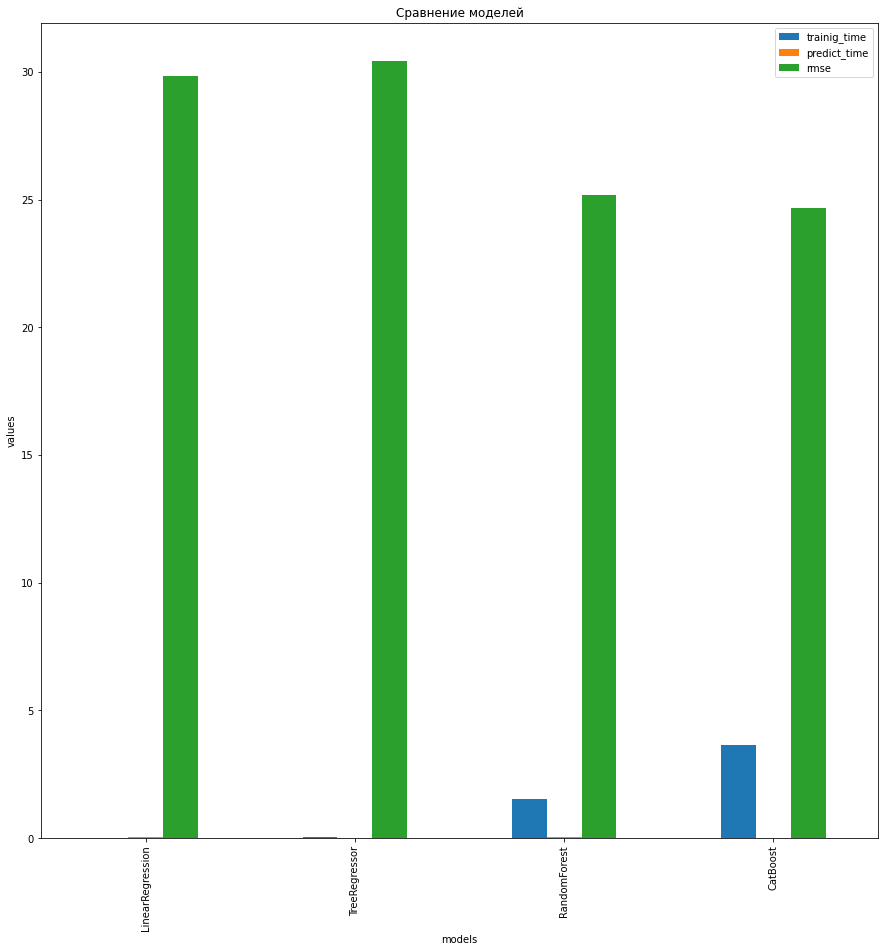

In [26]:
result_table.plot(kind='bar', legend=False, figsize=(15, 15))
plt.xlabel('models')
plt.ylabel('values')
plt.legend(list(result_table))
plt.title('Сравнение моделей')
plt.show()


- Обучил несколько разных моделий с разными гиперпараметрами
- Построил таблицу и график с результатами разных моделий 
- Лучше всего себя показал CatBoost

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовал разные модели в этом шаге!
</div>

## Тестирование

In [27]:
start = time.time() 
predict_test = best_model_cbr.predict(features_test)
end = time.time()
pred_cbr_time = end-start
cbr_model_score = (mse(target_test, predict_test))**0.5

print(cbr_model_score)
print(grid_cbr.refit_time_)
print(pred_cbr_time)

43.51196167447729
3.6425254344940186
0.002748250961303711


<div class="alert alert-block alert-success">
<b>Успех:</b> Тестирование было сделано корректно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Финальные предсказания можно было визуализирвоать: графики исходного и предсказанных рядов.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> <br>
я не понял , как это реализовать ) <br>
можешь акуюто инфу дать ? 

<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> Просто построить линии через plt.plot:
</div>

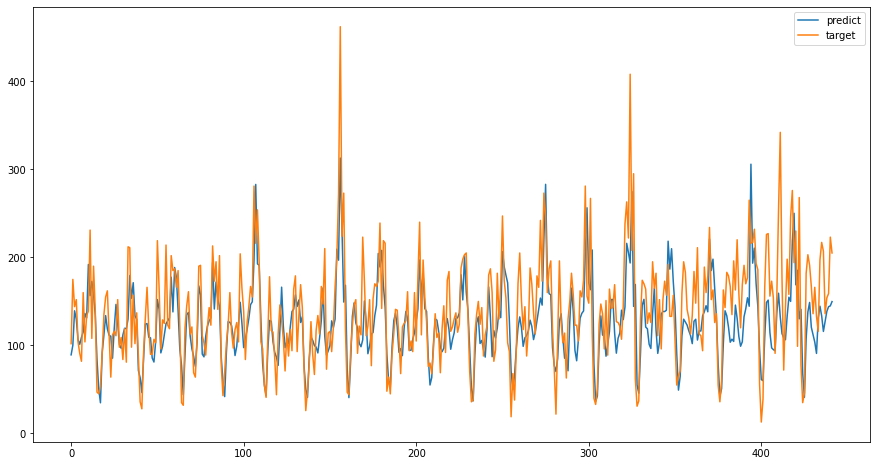

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.plot(predict_test)
plt.plot(target_test.reset_index()['num_orders'])
plt.legend(['predict', 'target'])

In [30]:
model = DummyRegressor()
model.fit(features_train, target_train)
prediction = model.predict(features_test)
dummy_model_score = (mse(target_test, prediction))**0.5
print(dummy_model_score)

84.67489517135586


- rmse CatBoost на тестовой воборке показал около 44, что выполняет условие задачи 
- константная модель показала результат присерно 85

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что ты не забыл про дамми проверку!
</div>

## Вывод:

- Загрузил данные и выполнил их ресемплирование по одному часу.
- Проанализировал данные.
- Обучил разные модели с различными гиперпараметрами.
- Проверил данные на тестовой выборке
- Лучший результат показала модель CatBoost

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть вывод в конце проекта!
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> <br>
 Спасибо за ревью

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48